In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 6]

In [2]:
df = pd.read_csv('data/public_seoul_cctv_2017.csv', thousands=',', skipfooter=1, encoding='EUC-KR')
df.head(10)

<ipython-input-2-13c6aea66af1>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data/public_seoul_cctv_2017.csv', thousands=',', skipfooter=1, encoding='EUC-KR')


,경찰서,개소,대수
0,중부,304,517
1,종로,214,480
2,남대문,159,202
3,서대문,376,1131
4,혜화,215,481
5,용산,632,1897
6,성북,453,1276
7,동대문,486,1396
8,마포,703,952
9,영등포,745,1122


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   경찰서     31 non-null     object
 1   개소      31 non-null     int64 
 2   대수      31 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 872.0+ bytes


In [4]:
len(df)

31

In [5]:
df.columns

Index(['경찰서', '개소', '대수'], dtype='object')

In [6]:
type(df['개소'][0])

numpy.int64

In [7]:
df.set_index('경찰서', inplace=True)
df.head(10)

,개소,대수
경찰서,,
중부,304,517
종로,214,480
남대문,159,202
서대문,376,1131
혜화,215,481
용산,632,1897
성북,453,1276
동대문,486,1396
마포,703,952


In [8]:
df['총합'] = df['개소'] + df['대수']

In [9]:
df = df.sort_values(by='총합', ascending=0)
df.head(10)

,개소,대수,총합
경찰서,,,
양천,763,2234,2997
관악,1042,1804,2846
노원,1288,1416,2704
수서,677,1856,2533
용산,632,1897,2529
구로,695,1691,2386
강남,596,1612,2208
동대문,486,1396,1882
영등포,745,1122,1867


In [10]:
df1 = pd.DataFrame({'개소':df['개소'], '대수':df['대수']})
df1.head(10)

,개소,대수
경찰서,,
양천,763,2234
관악,1042,1804
노원,1288,1416
수서,677,1856
용산,632,1897
구로,695,1691
강남,596,1612
동대문,486,1396
영등포,745,1122


<AxesSubplot:title={'center':'구별 경찰서수와 CCTV설치수'}, xlabel='경찰서', ylabel='개수'>

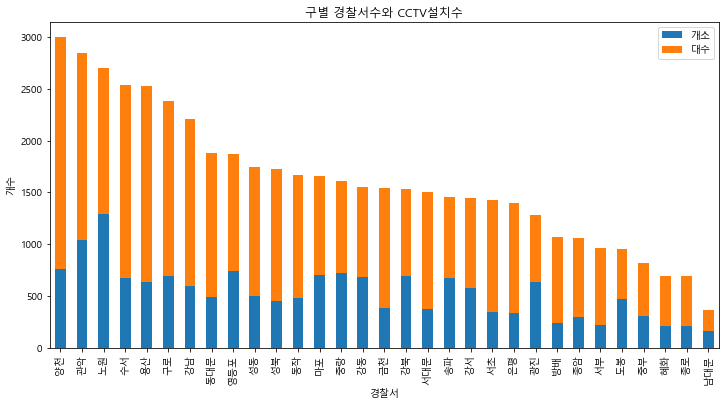

In [11]:
df1.plot(kind='bar', stacked=True, title='구별 경찰서수와 CCTV설치수', ylabel='개수')

In [12]:
df2 = df.sort_values(by='개소', ascending=False)

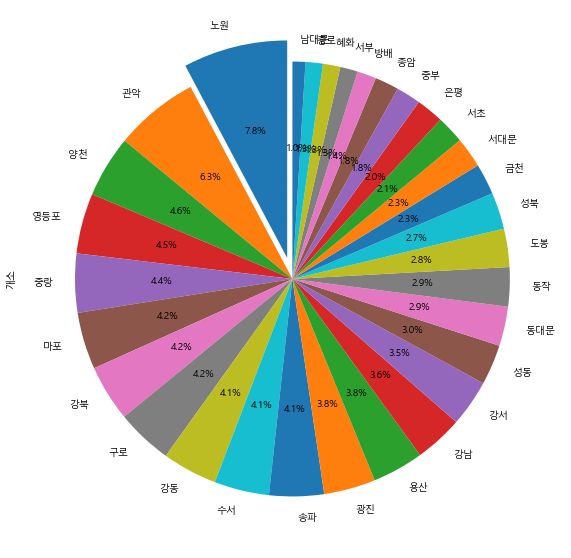

In [13]:
plt.rcParams['figure.figsize'] = [10, 10]
explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

df2['개소'].plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode)
plt.show()

In [14]:
df3 = df.sort_values(by='대수', ascending=False)

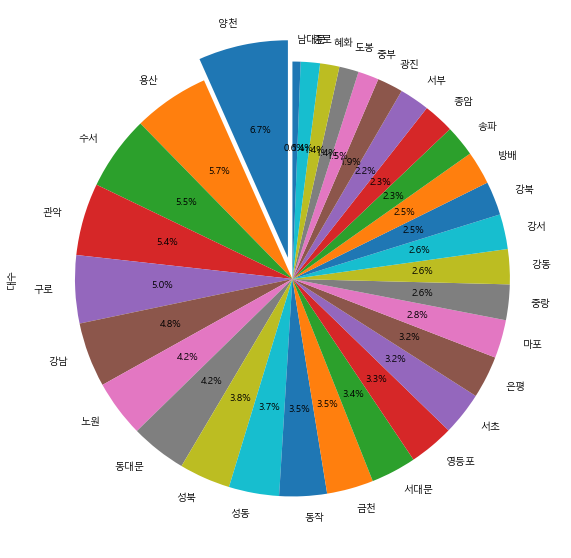

In [15]:
plt.rcParams['figure.figsize'] = [10, 10]
explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

df3['대수'].plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode)
plt.show()

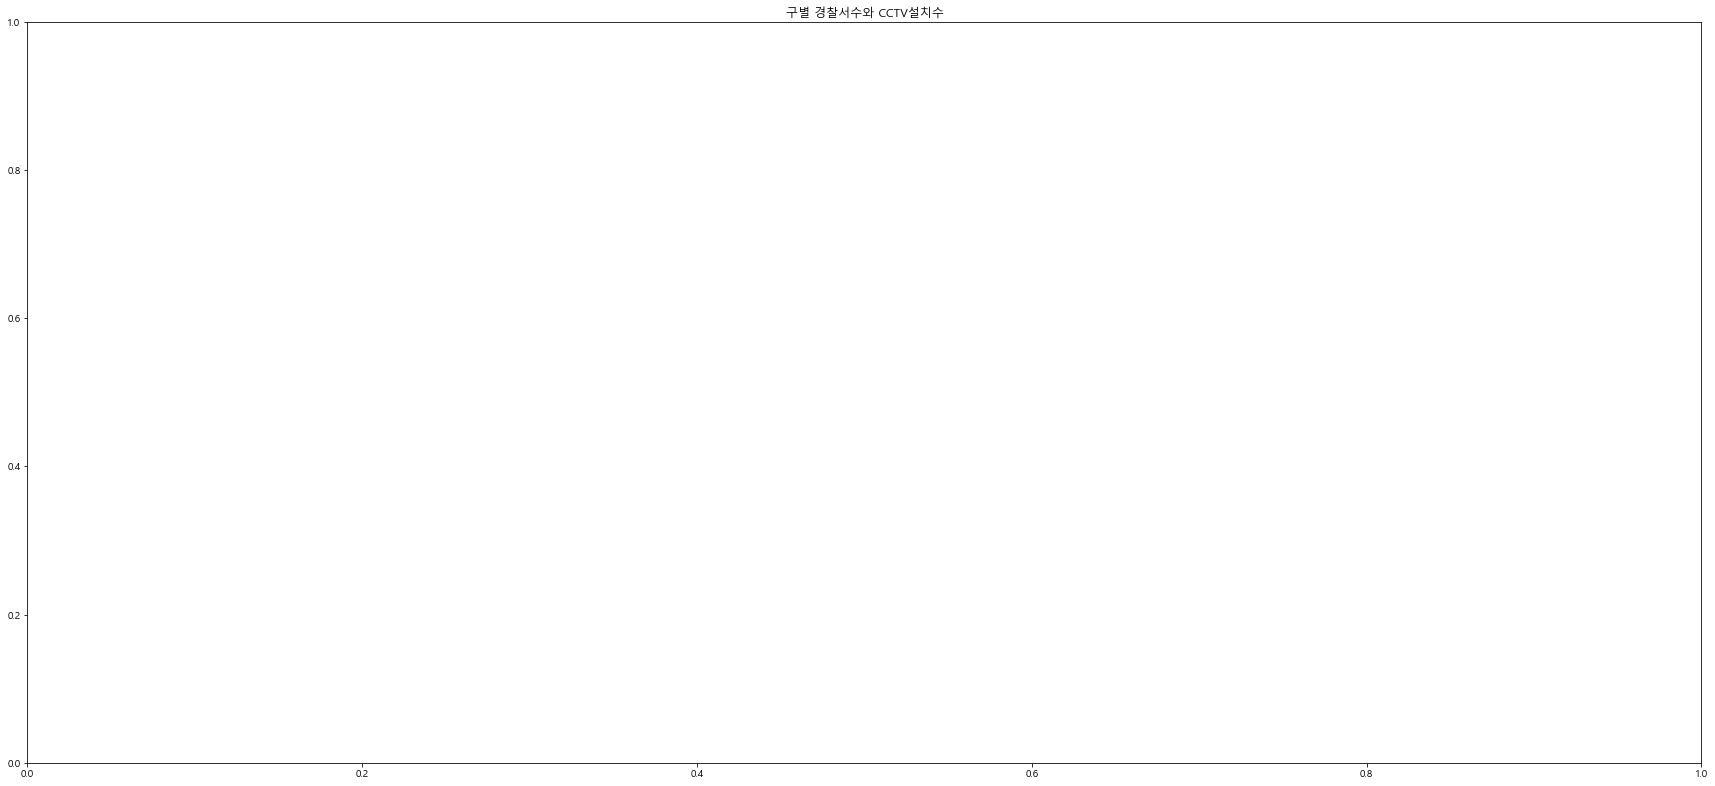

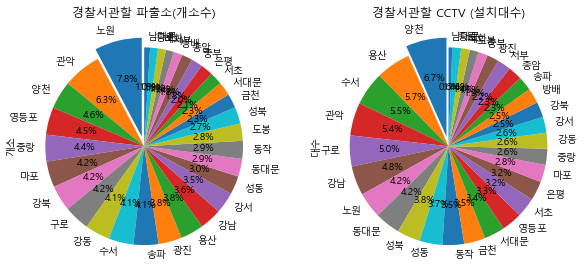

In [16]:
plt.figure(figsize=(30,30))

plt.subplot(211) 
plt.title('구별 경찰서수와 CCTV설치수')
df1.plot(kind='bar', stacked=True, ylabel='개수')
#subplot에만 누적 막대 그래프가 안 그려져요 ㅠㅠ

plt.subplot(223) 
plt.title('경찰서관할 파출소(개소수)')
df2['개소'].plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode)

plt.subplot(224)
plt.title('경찰서관할 CCTV (설치대수)')
df3['대수'].plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode)

plt.show()